# Pre-Masters Maths 6601PMEC

## Week 6 - Application of Partial Differentiation to Optimisation

Consider a closed rectangular $1 \text{litre}$ ice-cream box with dimensions $x, \, y, \, z$. What dimensions should the box have to minimise the packaging material?  
  
We want to minimise the total surface area of the box for a fixed volume of $1000\text{cm}^3$. Thus $xyz = 1000$ and $A = 2xy + 2yz + 2xz$.  
  
Firstly, using these two descriptions, eliminate $z$ from the surface area function:

In [20]:
import sympy as sym
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
x, y, z = sym.symbols('x y z')
sym.init_printing()

In [2]:
Eq1 = sym.Eq(x*y*z, 1000)
solz = sym.solve(Eq1, z)
solz

In [3]:
A = sym.Eq(2*x*y + 2*y*z + 2*x*z,0)
A2 = (A.lhs).subs(z, solz[0])
A2

Using matplotlib, a 3D surface plot and a contour plot will be used to represent the description for the surface area (in terms of $x$ and $y$). The SymPy plot function is easier to implement (an example of this will be given later) but it is limited in its functionality and customisability.

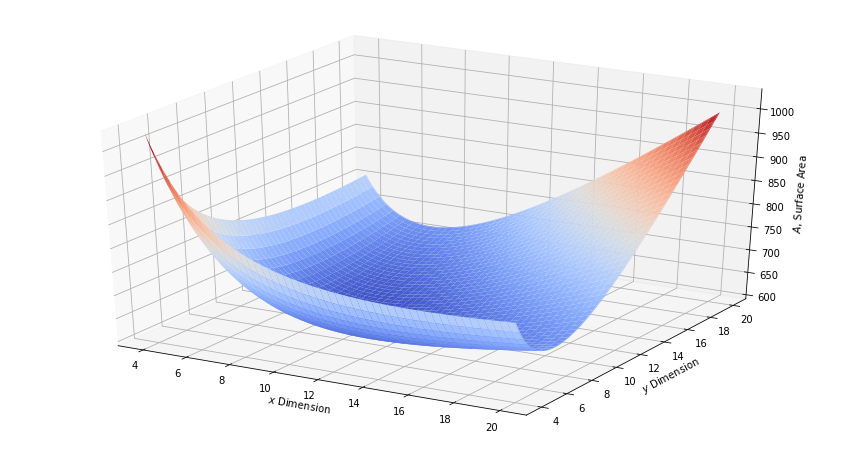

In [124]:
delta = 0.025 # spatial resolution
xpts = np.arange(4, 20, delta) # creates equally spaced points of delta in x-direction
ypts = np.arange(4, 20, delta) # repeating process in y-direction
X, Y = np.meshgrid(xpts, ypts) # uses xpts and ypts to create equally spaced points in 2D
fz = sym.lambdify((x,y), A2, 'numpy') # converting SymPy equation into Python lambda function
Z = fz(X, Y) # calculates surface area magnitude for all X and Y coordinate values
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize=(15,8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, 
                       cmap=cm.coolwarm, #this create a colour scheme different to default
                       antialiased=True)
_ = ax.set_xlabel('$x$ Dimension')
_ = ax.set_ylabel('$y$ Dimension')
_ = ax.set_zlabel('$A$, Surface Area')

and the contour plot representation of this is...

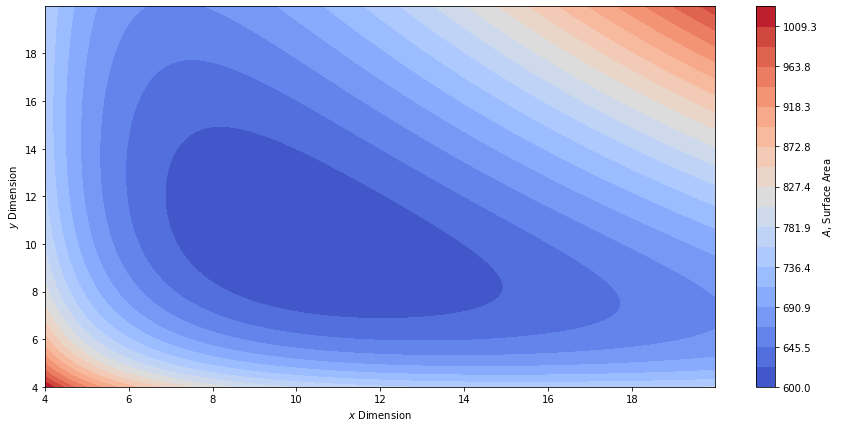

In [125]:
fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, 
                      levels=np.linspace(np.min(Z), np.max(Z), 20), #creates non-default levels
                      cmap=cm.coolwarm)
_ = ax.set_xlabel('$x$ Dimension')
_ = ax.set_ylabel('$y$ Dimension')
_ = fig.colorbar(contour, label='$A$, Surface Area')

We can also label where the minimum point occurs on this contour plot using the _annotate_ maplotlib command. Before we do this though, we need to know what the minimum value is and where does it occur within the array?

In [126]:
np.max(Z) # to find the maximum value

In [127]:
np.argmin(Z) # where in this array does it occur

153840

In [128]:
np.unravel_index(np.argmin(Z), np.shape(Z)) # converts argmin output into tuple of 2D coordinate

(240, 240)

Therefore, the minimum point occurs at the following $x$ and $y$ value:

In [129]:
X[240][240] #x value

In [130]:
Y[240][240] #y value

Bare in mind, the minimum point is being numerically approximated here and is totally dependant on the resolution (see delta variable value). Large delta value, poor approximation of point.

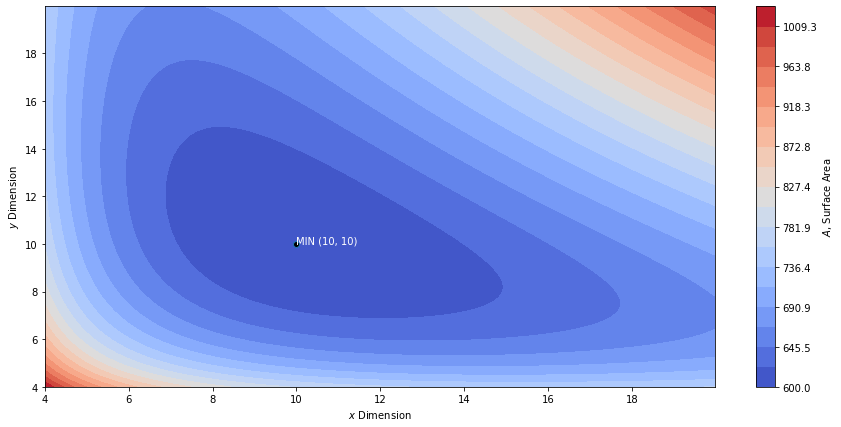

In [154]:
fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, levels=np.linspace(np.min(Z), np.max(Z), 20), cmap=cm.coolwarm)
_ = ax.set_xlabel('$x$ Dimension')
_ = ax.set_ylabel('$y$ Dimension')
_ = fig.colorbar(contour, label='$A$, Surface Area')
_ = ax.plot(X[240][240], Y[240][240], marker='o', markerfacecolor='black') # adds the marker
_ = ax.annotate('MIN (10, 10)', (X[240][240], Y[240][240]), color='white') # labels the min point

If the contour plot is to be printed in black and white, a labelled contour plot can be more useful...

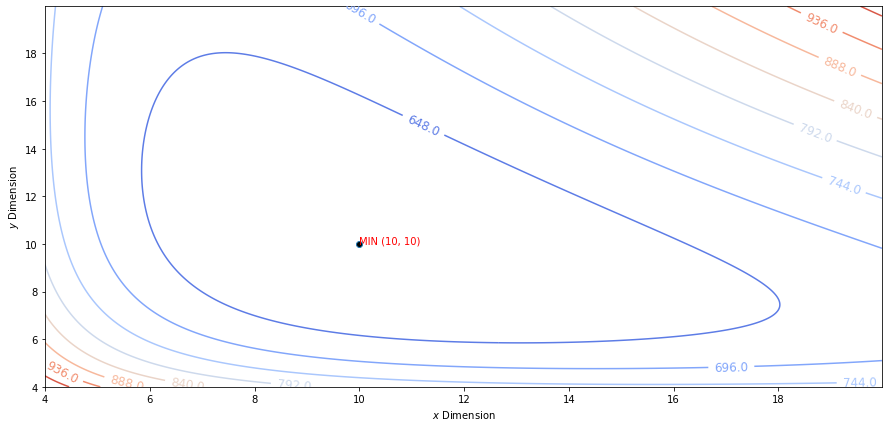

In [165]:
fig, ax = plt.subplots()
contour = ax.contour(X, Y, Z, 
                     levels=np.linspace(np.min(Z), np.max(Z), 10), 
                     cmap=cm.coolwarm)
_ = ax.set_xlabel('$x$ Dimension')
_ = ax.set_ylabel('$y$ Dimension')
_ = ax.clabel(contour, 
             fmt='%1.1f', # this changes the numerical labels to 1 decimal place
             fontsize=12)
_ = ax.plot(X[240][240], Y[240][240], marker='o', markerfacecolor='black')
_ = ax.annotate('MIN (10, 10)', (X[240][240], Y[240][240]), color='red')

Now to obtain the partial derivatives.

$\dfrac{\partial A}{\partial x}$ is

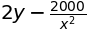

In [5]:
dAdx = A2.diff(x)
dAdx

$\dfrac{\partial A}{\partial y}$ is

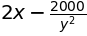

In [6]:
dAdy = A2.diff(y)
dAdy

For stationary points $\dfrac{\partial A}{\partial x}=0$ and $\dfrac{\partial A}{\partial y}=0$, the only non-zero, positive solutions are $x=10$ and $y=10$:  
$\dfrac{\partial^2 A}{\partial x^2}$ is

In [10]:
statPts = sym.solve([dAdx,dAdy],[x,y],dict=True)
statPts

In [11]:
xStat = statPts[0][x]
yStat = statPts[0][y]
print('Therefore the stationary point is', str((xStat,yStat)))

Therefore the stationary point is (10, 10)


Using the discriminant, $\Delta$, characterise the stationary point that has been determined...  
$\dfrac{\partial^2 A}{\partial x^2}$ is

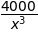

In [16]:
d2Adx2 = A2.diff(x, 2)
d2Adx2

$\dfrac{\partial^2 A}{\partial y^2}$ is

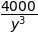

In [17]:
d2Ady2 = A2.diff(y, 2)
d2Ady2

$\dfrac{\partial^2 A}{\partial x \partial y}$ is

In [18]:
d2Adxdy = A2.diff(x, y)
d2Adxdy

$\Delta = \dfrac{\partial^2 A}{\partial x^2} \dfrac{\partial^2 A}{\partial y^2} - \left( \dfrac{\partial^2 A}{\partial x \partial x} \right)^2 $ is equal to:

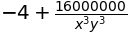

In [19]:
Delta = d2Adx2*d2Ady2 - d2Adxdy**2
Delta

In [20]:
Delta.subs([(x, xStat), (y, yStat)])

Due to the resulting value of the discriminant, $\Delta >0$, the stationary point is either a minimum or a maximum. Using the description for $\dfrac{\partial^2 A}{\partial x^2}$, the stationary point can be further evaluated.

In [21]:
d2Adx2.subs(x, xStat)

$\dfrac{\partial^2 A}{\partial x^2} > 0$, therefore the stationary point is a minimum.

Therefore the minimum surface area occurs when both $x$ and $y$ are equal to $10$. Substituting these values back into the surface area equation, $A$, gives a minimum surface area of

In [22]:
A2.subs([(x, xStat), (y, yStat)])

Example taken from the tutorial sheet...  
  
__1. Find and classify the stationary points of the functions:__  
    (a) $z= xy + \dfrac{y^2}{2} - 7y -4x$

In [23]:
z = x*y + y**2/2 - 7*y - 4*x
z

This time, the plotting functionality of SymPy will be used below to generate a 3D surface plot.

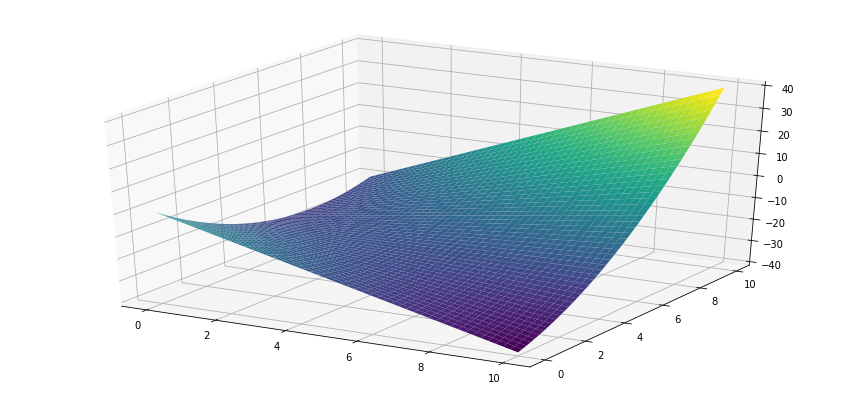

In [24]:
from sympy.plotting import plot3d
plot3d(z, (x,0,10), (y,0,10))

$\dfrac{\partial z}{\partial x}$ is

In [25]:
dzdx = z.diff(x)
dzdx

$\dfrac{\partial z}{\partial y}$ is

In [26]:
dzdy = z.diff(y)
dzdy

In [27]:
d2zdx2 = z.diff(x, 2)
d2zdy2 = z.diff(y, 2)
d2zdxdy = z.diff(x, y)
Delta = d2zdx2*d2zdy2 - d2zdxdy**2
Delta

Due to $\Delta < 0$, the point is a saddle point.
  
Therefore the saddle point is located at:

In [28]:
sym.solve([dzdx,dzdy],[x,y],dict=True)

***  
  
by Dr J T Wharton

***